In [2]:
import pandas as pd
df=pd.read_csv('sales_data_sample.csv',encoding='Latin-1')

In [3]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small


In [10]:
col_needed=['CUSTOMERNAME','ORDERNUMBER','ORDERDATE','SALES']
df=df[col_needed]

In [11]:
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])

In [12]:
# Calculate last order date for every customer
recent_dates = df.groupby('CUSTOMERNAME')['ORDERDATE'].max()
recent_dates

CUSTOMERNAME
AV Stores, Co.                2004-11-17
Alpha Cognac                  2005-03-28
Amica Models & Co.            2004-09-09
Anna's Decorations, Ltd       2005-03-09
Atelier graphique             2004-11-25
                                 ...    
Vida Sport, Ltd               2004-08-30
Vitachrome Inc.               2004-11-05
Volvo Model Replicas, Co      2004-11-19
West Coast Collectables Co.   2004-01-29
giftsbymail.co.uk             2004-11-01
Name: ORDERDATE, Length: 92, dtype: datetime64[ns]

In [13]:
# Calculate the most recent order date in the dataset
most_recent = df['ORDERDATE'].max()
most_recent

Timestamp('2005-05-31 00:00:00')

In [14]:
# Function to find difference between most recent date and last order date of every customer
def subtract_date(dt):
    difference = (most_recent - dt).days
    return difference

In [15]:
# apply function to get the days since last order for every customer
recency = recent_dates.apply(subtract_date)
recency

CUSTOMERNAME
AV Stores, Co.                 195
Alpha Cognac                    64
Amica Models & Co.             264
Anna's Decorations, Ltd         83
Atelier graphique              187
                              ... 
Vida Sport, Ltd                274
Vitachrome Inc.                207
Volvo Model Replicas, Co       193
West Coast Collectables Co.    488
giftsbymail.co.uk              211
Name: ORDERDATE, Length: 92, dtype: int64

<Axes: xlabel='CUSTOMERNAME'>

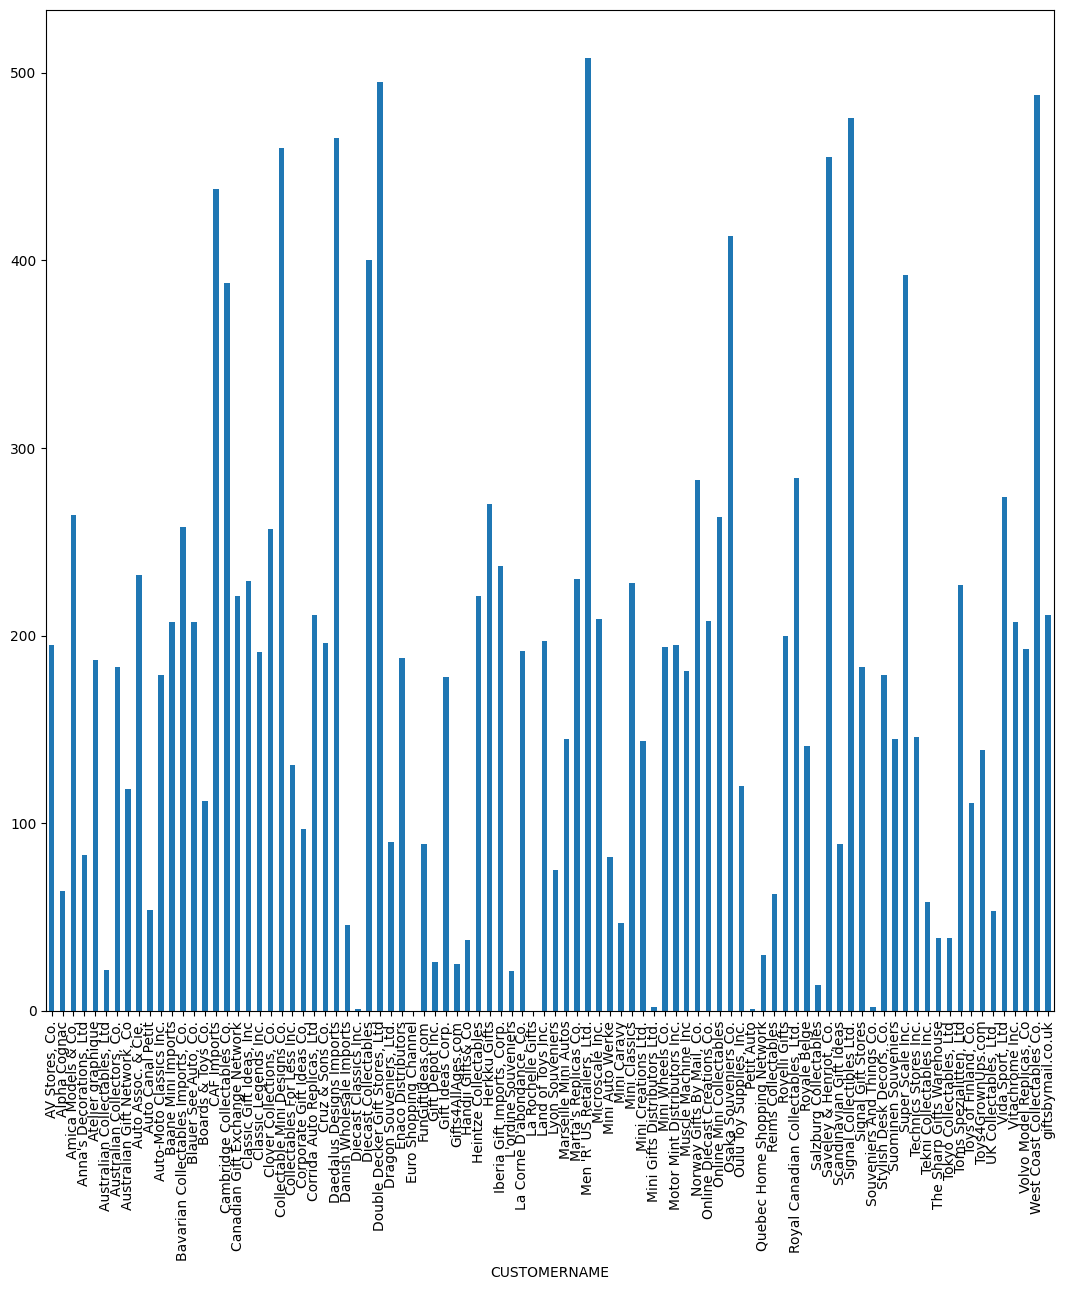

In [16]:
recency.plot(kind='bar',figsize=(13,13))

<Axes: ylabel='Frequency'>

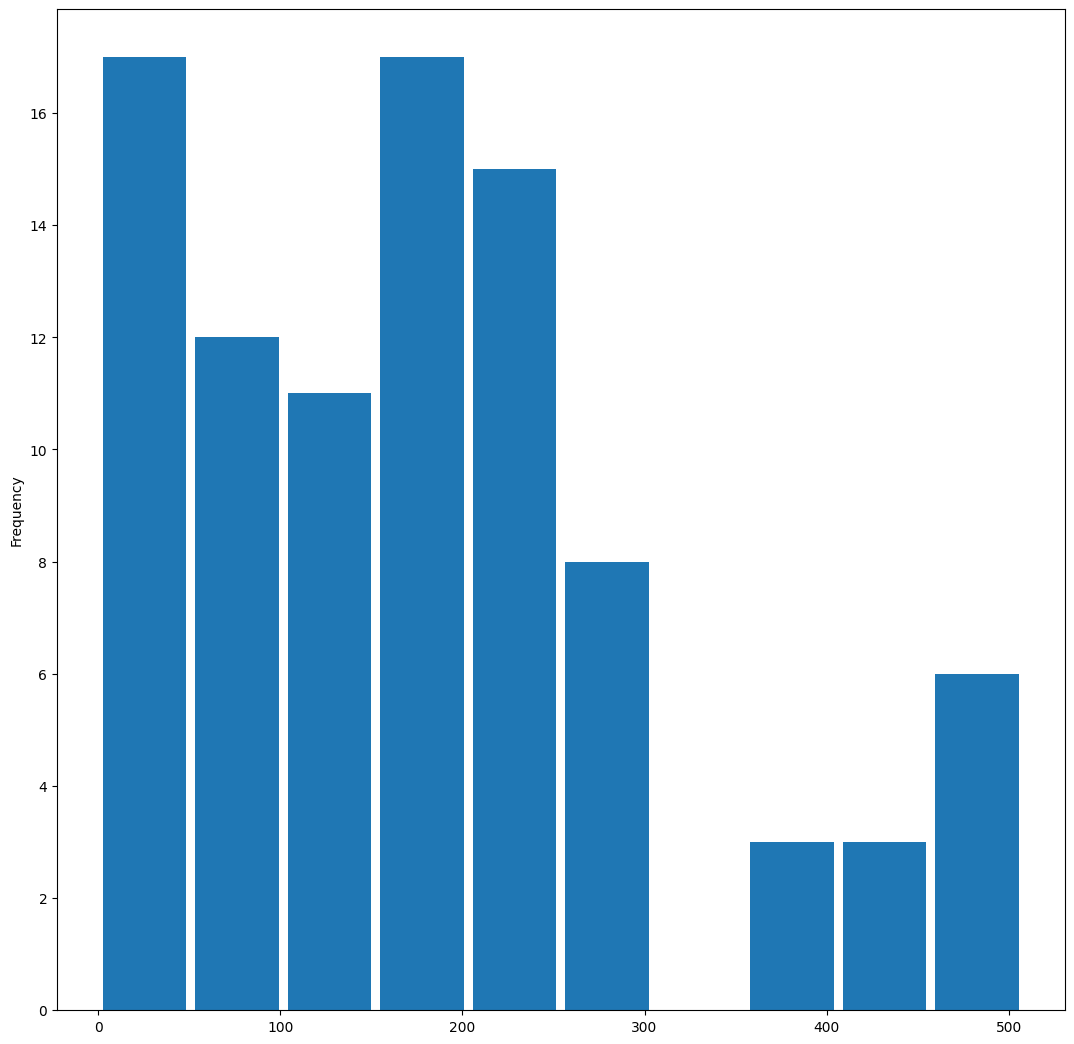

In [17]:
recency.plot(kind='hist',figsize=(13,13),rwidth=0.9)

In [18]:
# Group by with both CUSTOMERNAME and ORDERNUMBeR
frequency = df.groupby(['CUSTOMERNAME','ORDERNUMBER']).count()
frequency = df.groupby(['CUSTOMERNAME','ORDERNUMBER']).size()
frequency

CUSTOMERNAME                 ORDERNUMBER
AV Stores, Co.               10110          16
                             10306          17
                             10332          18
Alpha Cognac                 10136           3
                             10178          12
                                            ..
Volvo Model Replicas, Co     10334           6
West Coast Collectables Co.  10199           3
                             10215          10
giftsbymail.co.uk            10232           8
                             10316          18
Length: 307, dtype: int64

<Axes: xlabel='CUSTOMERNAME,ORDERNUMBER'>

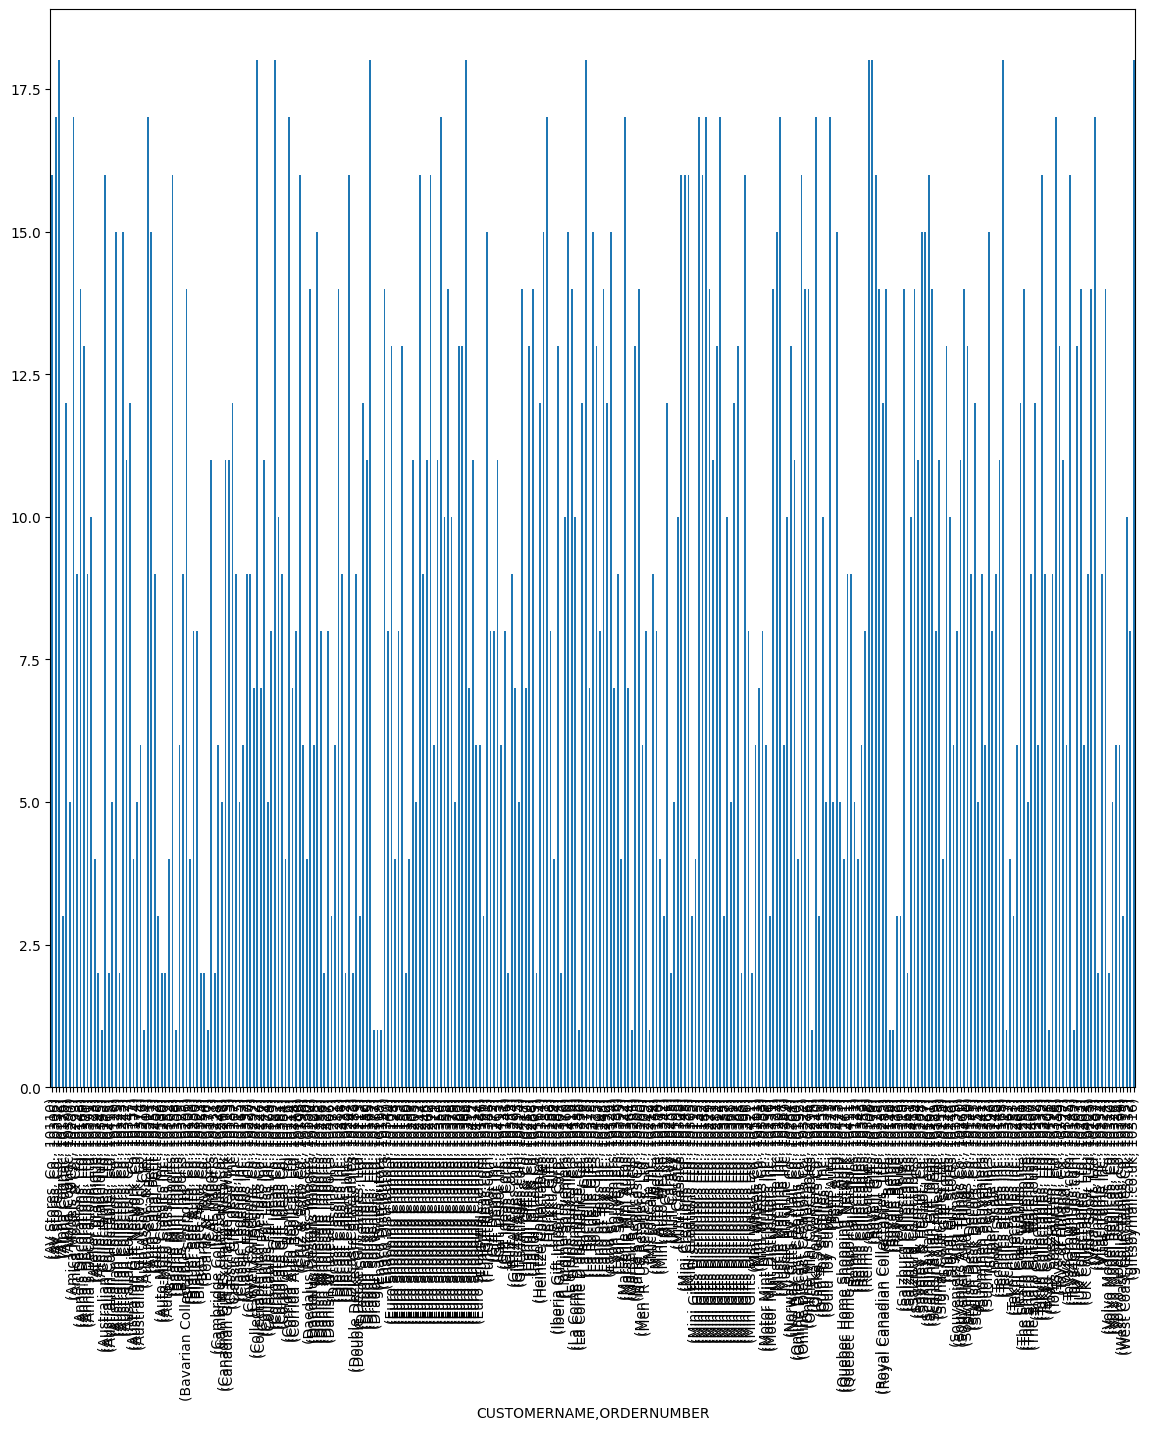

In [19]:
frequency.plot(kind='bar',figsize=(14,14))

<Axes: ylabel='Frequency'>

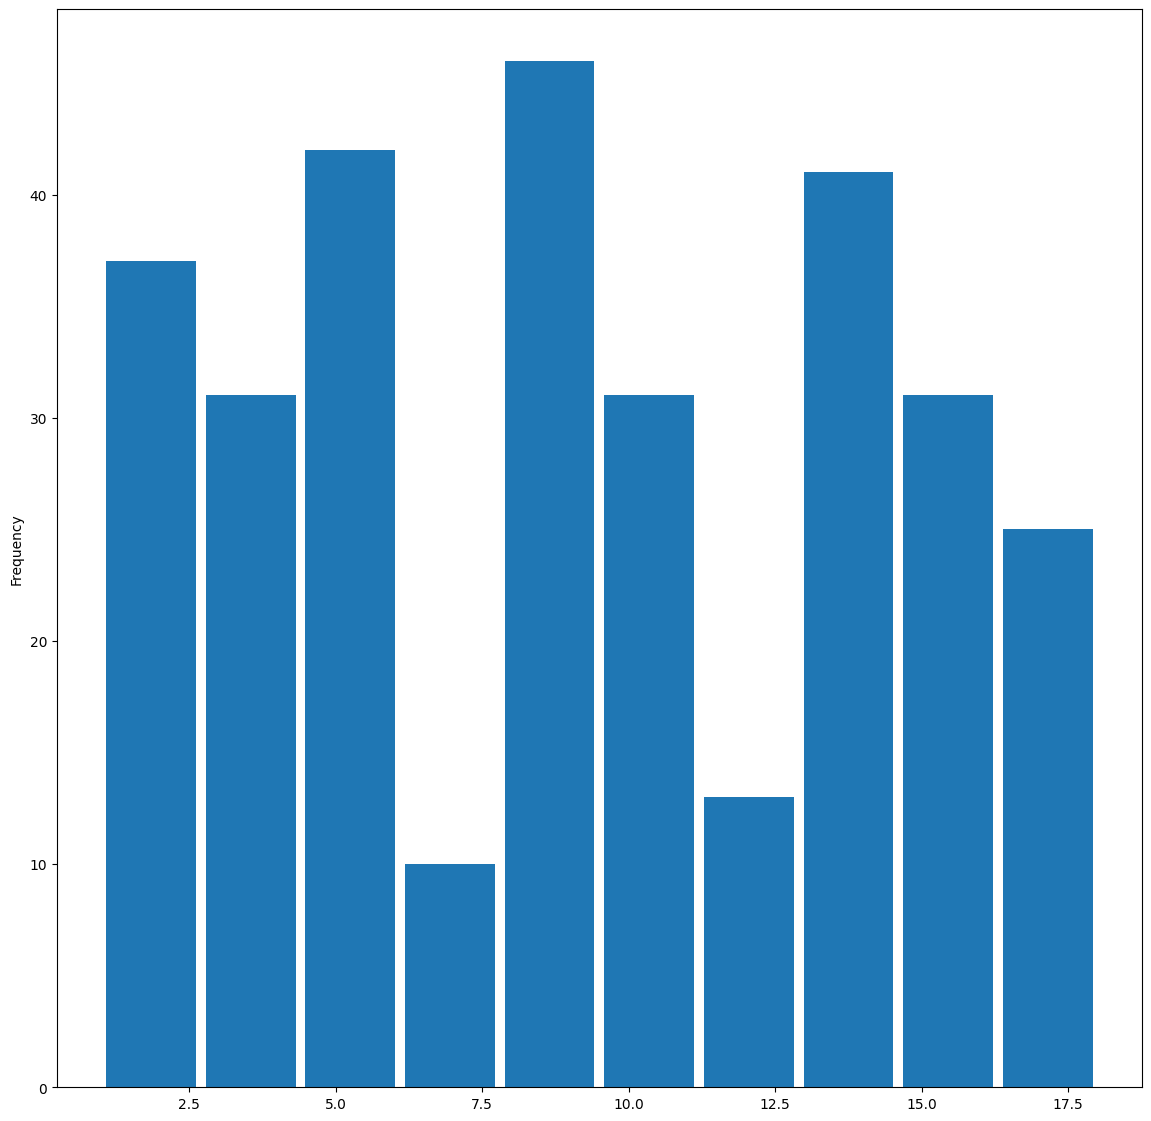

In [20]:
frequency.plot(kind='hist',figsize=(14,14),rwidth=0.9)

In [21]:
# Group by with CUSTOMERNAME
frequency = frequency.groupby('CUSTOMERNAME').size()
frequency

CUSTOMERNAME
AV Stores, Co.                 3
Alpha Cognac                   3
Amica Models & Co.             2
Anna's Decorations, Ltd        4
Atelier graphique              3
                              ..
Vida Sport, Ltd                2
Vitachrome Inc.                3
Volvo Model Replicas, Co       4
West Coast Collectables Co.    2
giftsbymail.co.uk              2
Length: 92, dtype: int64

In [22]:
monetary = df.groupby('CUSTOMERNAME')['SALES'].sum()
monetary

CUSTOMERNAME
AV Stores, Co.                 157807.81
Alpha Cognac                    70488.44
Amica Models & Co.              94117.26
Anna's Decorations, Ltd        153996.13
Atelier graphique               24179.96
                                 ...    
Vida Sport, Ltd                117713.56
Vitachrome Inc.                 88041.26
Volvo Model Replicas, Co        75754.88
West Coast Collectables Co.     46084.64
giftsbymail.co.uk               78240.84
Name: SALES, Length: 92, dtype: float64

In [23]:
rfm_table = pd.DataFrame()
rfm_table['Recency']=recency
rfm_table['Frequency']=frequency
rfm_table['Monetary']=monetary

In [24]:
rfm_table.head()

,Recency,Frequency,Monetary
CUSTOMERNAME,,,
"AV Stores, Co.",195,3,157807.81
Alpha Cognac,64,3,70488.44
Amica Models & Co.,264,2,94117.26
"Anna's Decorations, Ltd",83,4,153996.13
Atelier graphique,187,3,24179.96


In [25]:
quantile_df = rfm_table.quantile(q=[0.25,0.5,0.75])
quantile_df

,Recency,Frequency,Monetary
0.25,80.25,2.0,70129.4325
0.50,185.00,3.0,86522.6100
0.75,229.25,3.0,120575.8750


In [26]:
# Function to Convert into classes using quartiles
def quantile_classes(x,quantile_values,attribute):
 # recency
    if attribute == 'recency':
        if x <= quantile_values.loc[0.25,attribute]:
            return '4'
        elif x >= quantile_values.loc[0.25,attribute] and x <= quantile_values.loc[0.5,attribute]:
            return '3'
        elif x >= quantile_values.loc[0.5,attribute] and x <= quantile_values.loc[0.75,attribute]:
            return '2'
        else:
            return '1'
    else:
                                                                                  
        if x <= quantile_values.loc[0.25,attribute]:
            return '1'
        elif x >= quantile_values.loc[0.25,attribute] and x <= quantile_values.loc[0.5,attribute]:
            return '2'
        elif x >= quantile_values.loc[0.5,attribute] and x <= quantile_values.loc[0.75,attribute]:
            return '3'
        else:
            return '4'
# Caculate quantiles
#quantile_df = rfm_table.quantile(q=[0.25,0.5,0.75])
#COnvert to classes using quantiles
#rfm_table['r_class'] = rfm_table['Recency'].apply(quantile_classes,args = (quantile_df,'Recency'))
#rfm_table['f_class'] = rfm_table['Frequency'].apply(quantile_classes,args = (quantile_df,'Frequency'))
#rfm_table['m_class'] = rfm_table['Monetary'].apply(quantile_classes,args = (quantile_df,'Monetary'))
#print(rfm_table.head())'''

In [27]:
rfm_table['Recency'] = pd.to_numeric(rfm_table['Recency'], errors='coerce')
rfm_table['Frequency'] = pd.to_numeric(rfm_table['Frequency'], errors='coerce')
rfm_table['Monetary'] = pd.to_numeric(rfm_table['Monetary'], errors='coerce')
print(rfm_table.head())

                         Recency  Frequency   Monetary
CUSTOMERNAME                                          
AV Stores, Co.               195          3  157807.81
Alpha Cognac                  64          3   70488.44
Amica Models & Co.           264          2   94117.26
Anna's Decorations, Ltd       83          4  153996.13
Atelier graphique            187          3   24179.96


In [28]:
rfm_table['r_class'] = rfm_table['Recency'].apply(quantile_classes,args = (quantile_df,'Recency'))
rfm_table['f_class'] = rfm_table['Frequency'].apply(quantile_classes,args = (quantile_df,'Frequency'))
rfm_table['m_class'] = rfm_table['Monetary'].apply(quantile_classes,args = (quantile_df,'Monetary'))
print(rfm_table.head())

                         Recency  Frequency   Monetary r_class f_class m_class
CUSTOMERNAME                                                                  
AV Stores, Co.               195          3  157807.81       3       2       4
Alpha Cognac                  64          3   70488.44       1       2       2
Amica Models & Co.           264          2   94117.26       4       1       3
Anna's Decorations, Ltd       83          4  153996.13       2       4       4
Atelier graphique            187          3   24179.96       3       2       1


In [29]:
# Combine classes
rfm_table['rfm'] = rfm_table['r_class'] + rfm_table['f_class'] + rfm_table['m_class']
print(rfm_table['rfm'].head())

CUSTOMERNAME
AV Stores, Co.             324
Alpha Cognac               122
Amica Models & Co.         413
Anna's Decorations, Ltd    244
Atelier graphique          321
Name: rfm, dtype: object


In [30]:
rfm_table.head(3)

,Recency,Frequency,Monetary,r_class,f_class,m_class,rfm
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",195,3,157807.81,3,2,4,324
Alpha Cognac,64,3,70488.44,1,2,2,122
Amica Models & Co.,264,2,94117.26,4,1,3,413


In [31]:
rfm_table['rfm'].unique()

array(['324', '122', '413', '244', '321', '121', '221', '411', '123',
       '343', '342', '211', '312', '311', '322', '222', '323', '144',
       '412', '223', '143', '313', '423', '124', '344', '241', '424',
       '224'], dtype=object)

In [32]:
# Convert to Integers
rfm_table['rfm'] = pd.to_numeric(rfm_table['rfm'])
rfm_table = rfm_table.sort_values(by = 'rfm',ascending=False)
print(rfm_table['rfm'].head(20))

CUSTOMERNAME
Saveley & Henriot, Co.               424
Herkku Gifts                         423
Collectable Mini Designs Co.         413
Amica Models & Co.                   413
Marta's Replicas Co.                 413
Vida Sport, Ltd                      413
Norway Gifts By Mail, Co.            412
Diecast Collectables                 412
Super Scale Inc.                     412
Royal Canadian Collectables, Ltd.    412
Men 'R' US Retailers, Ltd.           411
Double Decker Gift Stores, Ltd       411
Online Mini Collectables             411
Daedalus Designs Imports             411
Osaka Souveniers Co.                 411
Clover Collections, Co.              411
Iberia Gift Imports, Corp.           411
Cambridge Collectables Co.           411
West Coast Collectables Co.          411
Signal Collectibles Ltd.             411
Name: rfm, dtype: int64
